In [7]:
#conda activate 6.86x
#jupyter notebook

import sklearn
import numpy as np
import matplotlib.pyplot as plt
import math
print(sklearn.__version__)

0.23.2


## Neural Network

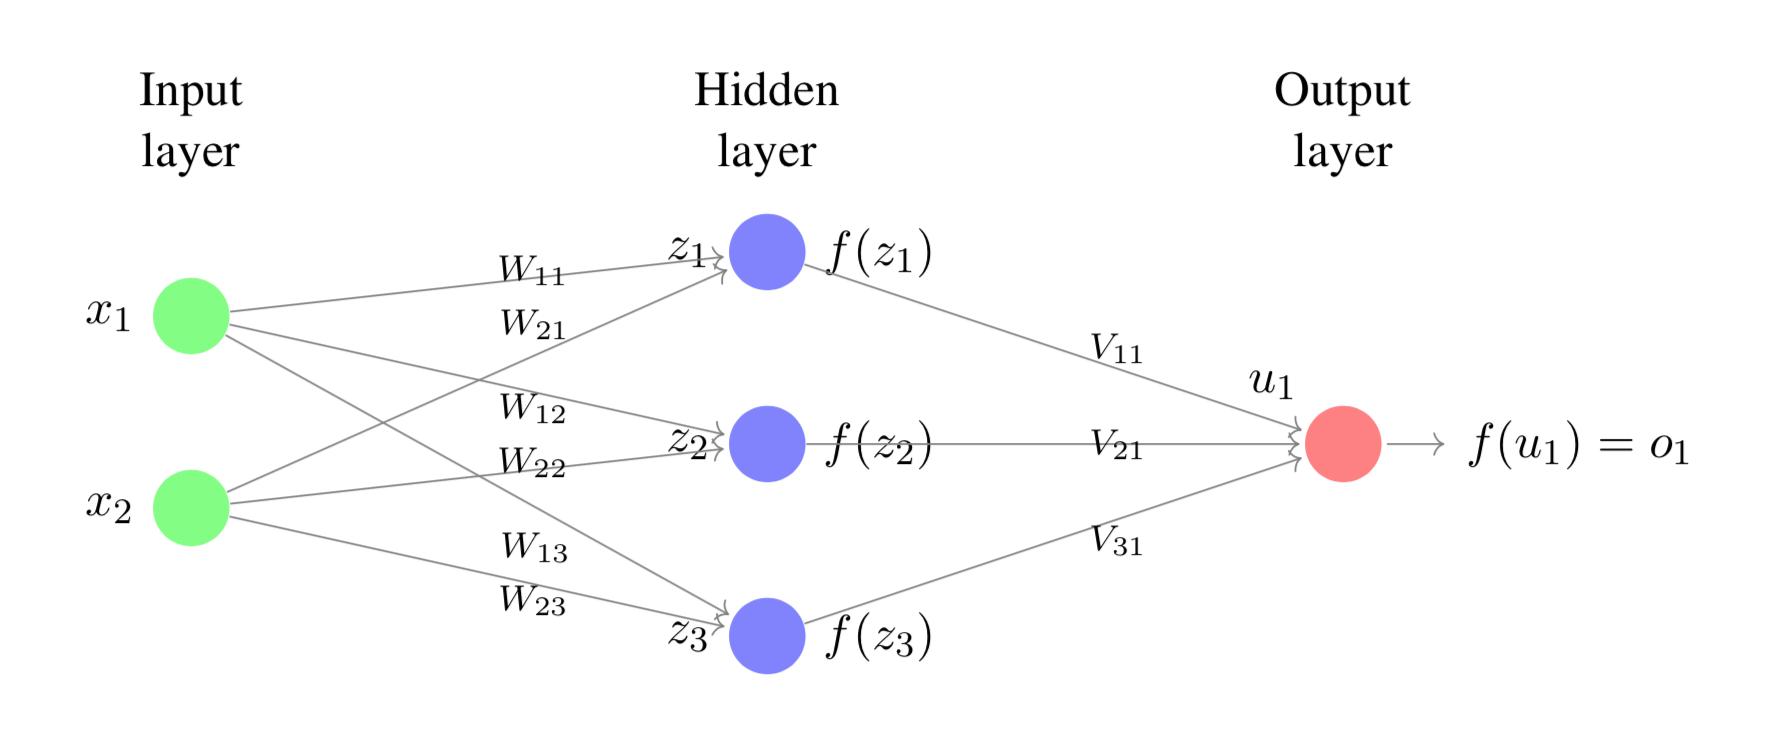

In [10]:
def rectified_linear_unit(x):
    """ Returns the ReLU of x, or the maximum between 0 and x."""
    if x > 0: 
        output = x
    else: 
        output = 0
    return(output)

In [14]:
rectified_linear_unit(9.1)

9.1

In [15]:
def rectified_linear_unit_derivative(x):
    """ Returns the derivative of ReLU."""
    if x > 0: 
        output = 1
    else: 
        output = 0
    return(output)

In [18]:
rectified_linear_unit_derivative(0)

0

In [80]:
def output_layer_activation(x):
    """ Linear function, returns input as is. """
    return x

def output_layer_activation_derivative(x):
    """ Returns the derivative of a linear function: 1. """
    return 1

In [199]:
input_to_hidden_weights = np.matrix('1. 1.; 1. 1.; 1. 1.')
hidden_to_output_weights = np.matrix('1. 1. 1.')
biases = np.matrix('0.; 0.; 0.')
learning_rate = .001
epochs_to_train = 10
training_points = [((2,1), 10), ((3,3), 21), ((4,5), 32), ((6, 6), 42)]
testing_points = [(1,1), (2,2), (3,3), (5,5), (10,10)]

input_values = np.matrix([[1],[2]])

In [110]:
input_to_hidden_weights

matrix([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [111]:
input_values

matrix([[1],
        [2]])

In [112]:
hidden_layer_weighted_input = np.dot(input_to_hidden_weights, input_values) + biases
hidden_layer_weighted_input

matrix([[3.],
        [3.],
        [3.]])

In [113]:
vk = np.vectorize(rectified_linear_unit)
hidden_layer_activation = vk(hidden_layer_weighted_input)
hidden_layer_activation

matrix([[3.],
        [3.],
        [3.]])

In [114]:
output = np.dot(hidden_to_output_weights, hidden_layer_activation)
output

matrix([[9.]])

In [115]:
vk2 = np.vectorize(output_layer_activation)
vk2(output)

matrix([[9.]])

In [99]:
def predict(self, x1, x2):

        input_values = np.matrix([[x1],[x2]])

        # Compute output for a single input(should be same as the forward propagation in training)
        hidden_layer_weighted_input = np.dot(input_to_hidden_weights, input_values) + biases
        vk = np.vectorize(rectified_linear_unit)
        hidden_layer_activation = vk(hidden_layer_weighted_input)
        output = np.dot(hidden_to_output_weights, hidden_layer_activation)
        vk2 = np.vectorize(output_layer_activation)
        activated_output = vk2(output)

        return activated_output.item()

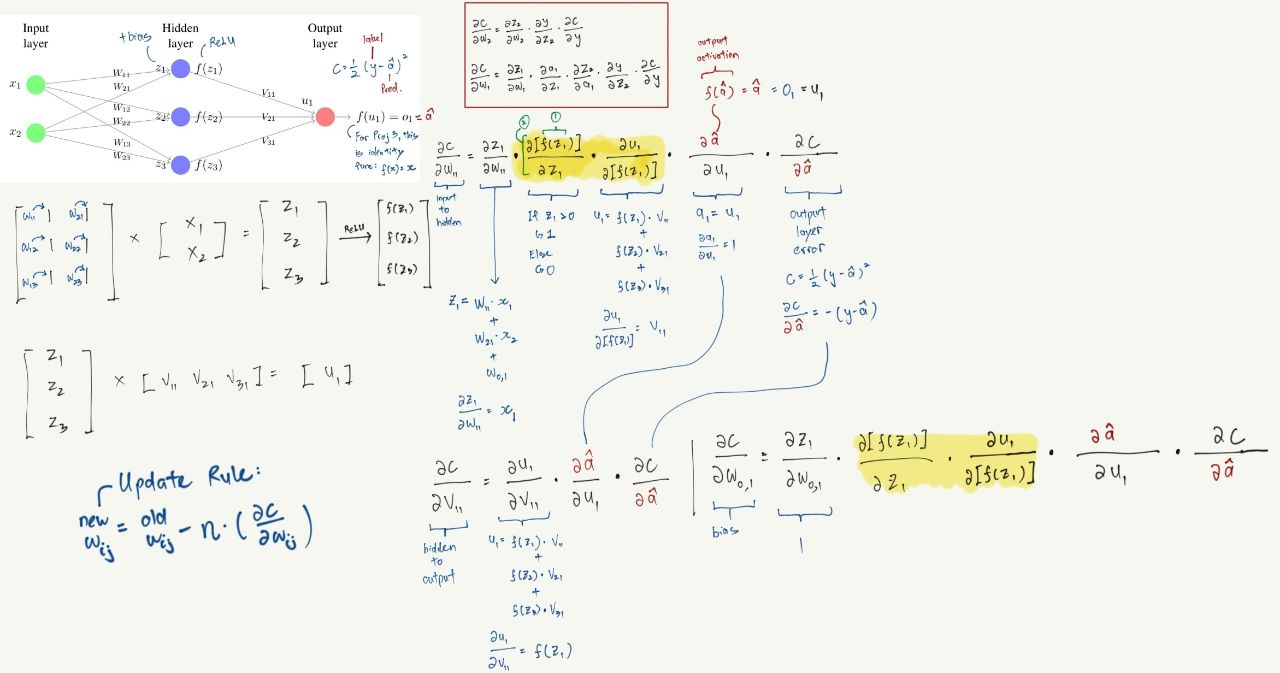

In [202]:
 def train(self, x1, x2, y):

        ### Forward propagation ###
        input_values = np.matrix([[x1],[x2]]) # 2 by 1

        # Calculate the input and activation of the hidden layer
        hidden_layer_weighted_input = np.dot(self.input_to_hidden_weights, input_values) + self.biases
        vk_rectified_linear_unit = np.vectorize(rectified_linear_unit)
        hidden_layer_activation = vk_rectified_linear_unit(hidden_layer_weighted_input)

        output =  np.dot(self.hidden_to_output_weights, hidden_layer_activation)
        vk_output_layer_activation = np.vectorize(output_layer_activation)
        activated_output = vk_output_layer_activation(output)
        activated_output = activated_output.item()


        ### Backpropagation ###

        # Compute gradients
        output_layer_error = 0.5*(activated_output-y)**2
        dC_da = -(y-activated_output)
        da_du = np.vectorize(output_layer_activation_derivative) #not using as it is 1
        dC_dv = hidden_layer_activation*dC_da
        dC_dfz = self.hidden_to_output_weights*dC_da
        dC_dfz = dC_dfz.T
        vk_rectified_linear_unit_derivative = np.vectorize(rectified_linear_unit_derivative)
        dfz_dz = vk_rectified_linear_unit_derivative(hidden_layer_weighted_input)
        dC_dz = np.multiply(dfz_dz, dC_dfz)
        dC_dw = np.matmul(dC_dz, input_values.T)
        dC_dw0 = dC_dz
        
        hidden_layer_error = dC_dfz

        bias_gradients = dC_dw0
        hidden_to_output_weight_gradients = dC_dv.T
        input_to_hidden_weight_gradients = dC_dw
        

        # Use gradients to adjust weights and biases using gradient descent
        
        self.biases = self.biases - self.learning_rate*bias_gradients
        self.input_to_hidden_weights = self.input_to_hidden_weights - self.learning_rate*input_to_hidden_weight_gradients
        self.hidden_to_output_weights = self.hidden_to_output_weights - self.learning_rate*hidden_to_output_weight_gradients

## Digit recognition using PyTorch

In [218]:
import torch

In [219]:
print(torch.__version__)

1.6.0


In [220]:
## https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/

In [223]:
torch.cuda.is_available()

False